<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

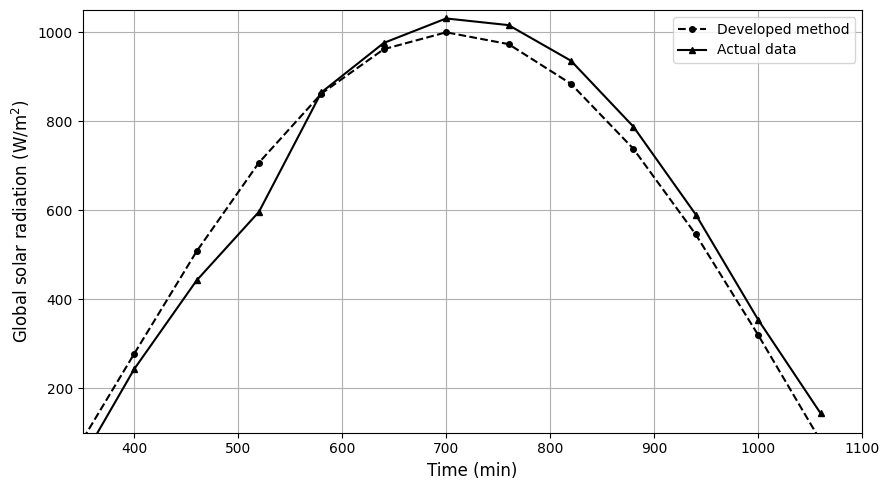

In [5]:
#Example 1.5

import numpy as np
import matplotlib.pyplot as plt

# Location: Kuwait City
L = 29.36  # Latitude
LOD = 47.97  # Longitude
N = 122  # Day number
T_GMT = +3  # Time difference from GMT
Step = 60  # Time step in minutes

# Declination angle
Ds = 23.45 * np.sin(np.radians((360 * (N - 81)) / 365))

# Equation of time
B = (360 * (N - 81)) / 364
EoT = (9.87 * np.sin(np.radians(2 * B))) - \
      (7.53 * np.cos(np.radians(B))) - \
      (1.5 * np.sin(np.radians(B)))

# Local Meridian Standard Time
Lzt = 15 * T_GMT
Ts_correction = (-4 * (Lzt - LOD)) + EoT if LOD >= 0 else (4 * (Lzt - LOD)) + EoT

# Sunrise/Sunset hour angle
Wsr_ssi = -np.tan(np.radians(Ds)) * np.tan(np.radians(L))
Wsrsr_ss = np.degrees(np.arccos(Wsr_ssi))

# Sunrise and sunset in solar time (minutes)
ASTsr = abs(((Wsrsr_ss / 15) - 12) * 60)
ASTss = ((Wsrsr_ss / 15) + 12) * 60
Tsr = ASTsr + abs(Ts_correction)
Tss = ASTss + abs(Ts_correction)

# Local Mean Time (in minutes)
LMT = np.arange(Tsr, Tss + Step, Step)
sin_Alpha = []

for t in LMT:
    Ts = t + Ts_correction
    Hs = (15 * (Ts - (12 * 60))) / 60
    sin_Alpha_i = (np.sin(np.radians(L)) * np.sin(np.radians(Ds)) +
                   np.cos(np.radians(L)) * np.cos(np.radians(Ds)) * np.cos(np.radians(Hs)))
    sin_Alpha.append(sin_Alpha_i)

sin_Alpha = np.array(sin_Alpha)

# Solar radiation calculation
A = 1160 + (75 * np.sin(np.radians((360 / 365) * (N - 275))))
k = 0.174 + (0.035 * np.sin(np.radians((360 / 365) * (N - 100))))
C = 0.095 + (0.04 * np.sin(np.radians((360 / 365) * (N - 100))))
G_B_norm = A * np.exp(-k / sin_Alpha)
G_B = G_B_norm * sin_Alpha
G_D = C * G_B_norm
G_T = G_B + G_D

# Mask out unreliable values at very low sun angles
valid_mask = sin_Alpha > 0.1
LMT_valid = LMT[valid_mask]
G_T_valid = G_T[valid_mask]


G_A = np.array([0.000, 0.2431, 0.4422, 0.5966, 0.865, 0.976,
                1.031, 1.016, 0.936, 0.788, 0.5904, 0.3541, 0.1439]) * 1e3
G_A = G_A[:len(LMT_valid)]

# Plot
plt.figure(figsize=(9, 5))
plt.plot(LMT_valid, G_T_valid, 'k--o', markersize=4, label='Developed method')
plt.plot(LMT_valid, G_A, 'k-^', markersize=4, label='Actual data')
plt.xlabel('Time (min)', fontsize=12)
plt.ylabel(r'Global solar radiation (W/m$^2$)', fontsize=12)
plt.xlim(350, 1100)
plt.ylim(100, 1050)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
